**Ofir David**: [https://prove-me-wrong.com/](https://prove-me-wrong.com/)

**Contact**:	 [totallyRealField@gmail.com](mailto:totallyRealField@gmail.com)
<div style="width: 45%; margin: 0 auto; height: 10px; background-image: radial-gradient(circle, black 2px, transparent 2px); background-size: 15px 15px;"></div>
<h1 style="text-align:center;">Visual Transformers: Learning Fractals</h1>
<div style="width: 45%; margin: 0 auto; height: 15px; background-image: radial-gradient(circle, black 2px, transparent 2px); background-size: 15px 15px;"></div>

# 🐍 Python initialization

In [22]:
import importlib
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random
import sys
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from typing import List

np.set_printoptions(precision=2)

project_root = os.path.abspath("..")  
if project_root not in sys.path:
    sys.path.append(project_root)

from attention import vision_transformer
from general import model_tester;
# in case I updated the code  
importlib.reload(vision_transformer)   
importlib.reload(model_tester)   

def print_in_columns(words: List[str], num_columns=3, space=30):
    import math
    # Calculate how many words should go in each column
    words_per_column = math.ceil(len(words) / num_columns)
    columns = [words[i:i + words_per_column] for i in range(0, len(words), words_per_column)]
    columns[-1] += ['']*(words_per_column-len(columns[-1]))

    # Ensure the number of columns matches the requested number
    # If there are leftovers, append them to the last column
    if len(columns) < num_columns:
        columns.extend([[]] * (num_columns - len(columns)))

    # Print the columns side by side
    for row in zip(*columns):
        print("   ".join(word.ljust(space) for word in row))

def set_seed(seed: int = 0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)


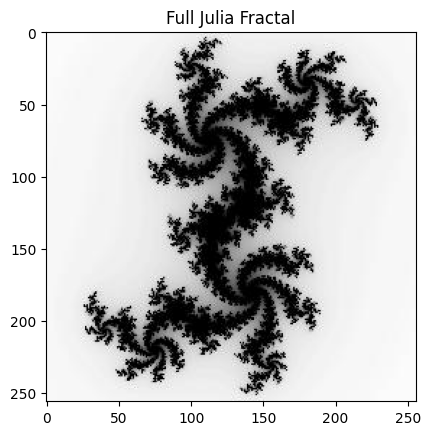

In [9]:
full_julia_image = mpimg.imread(r'C:\Users\eofir\PycharmProjects\shaders\julia\data\julia_full.jpg')
fig, ax = plt.subplots()
ax.imshow(full_julia_image)
ax.set_title('Full Julia Fractal')
plt.show()

In [26]:
dataset = vision_transformer.MyImageDataset(r'C:\Users\eofir\PycharmProjects\shaders\julia\data\dataset_only_position.pt')

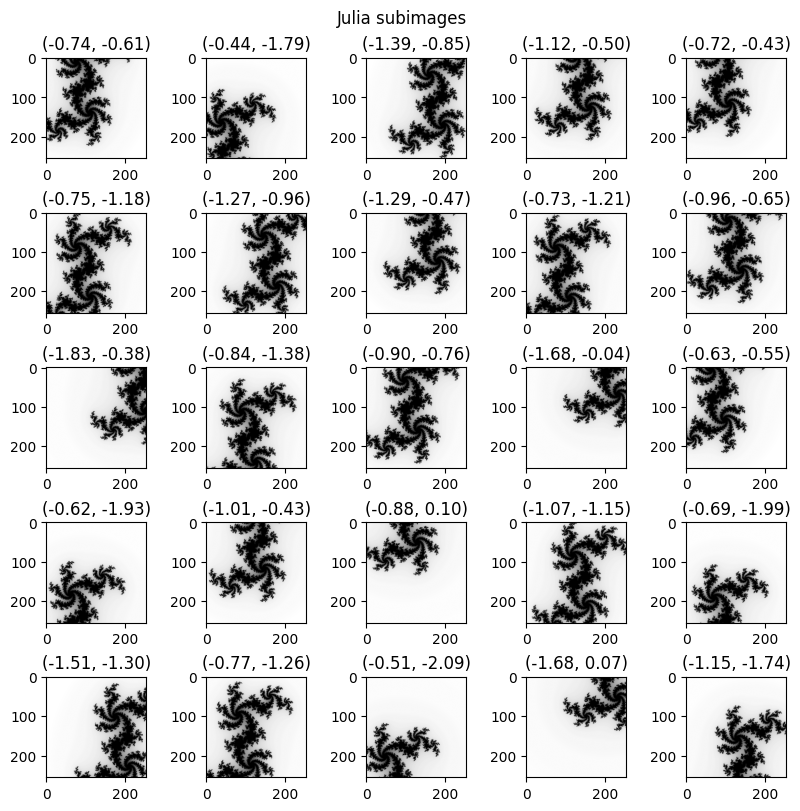

In [11]:
fig, axes = plt.subplots(5,5, figsize=(8,8), constrained_layout=True)
fig.suptitle('Julia subimages')
subset = (dataset.zoom == 2.0)

for ax, img, v in zip(axes.reshape(-1), dataset.images[subset], dataset.position[subset]):
    ax.imshow(img.squeeze().detach().numpy(), cmap='gray')

    formatted_title = f"({v[0]:.2f}, {v[1]:.2f})"
    ax.set_title(formatted_title)
plt.show()

In [25]:
model = vision_transformer.VisionTransformer(
    image_size = 256, image_channels = 1,
    patch_size = 8, emb_dim = 16
)

In [27]:

train_loader=DataLoader(dataset, batch_size=32, shuffle=False)

model_tester.train_model(
    model = model,
    data_loader = train_loader, train_size = len(dataset),
    loss_function = nn.MSELoss())

 |----------------------------------------------------------------------------------------------------| 0.0% 

C:\Users\eofir\PycharmProjects\ai_projects\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32, 2])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


TypeError: empty_callback() takes 2 positional arguments but 3 were given